# **Imports**

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# **Data set**


In [11]:
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

# **Required tasks**

1. Dataset visualization:

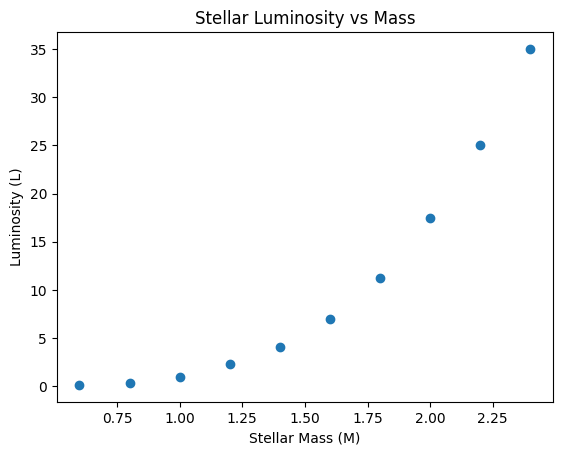

In [12]:
plt.figure()
plt.scatter(M, L)
plt.xlabel("Stellar Mass (M)")
plt.ylabel("Luminosity (L)")
plt.title("Stellar Luminosity vs Mass")
plt.show()


La grafica muestra una relacion creciente entre la luminosidad y la masa estelar.La relacion que tienen las variables no se muestra de manera lineal sino mas bien aparenta ser una relacion exponencial, esto ya que la luminosidad aumenta mucho mas rapido para masas mas grandes.

En cuanto a la plausibilidad, en terminos fisicos si lo es, ya que las estrellas entre mas masivas sean tendran mayores temperaturas internas y mayores tazas de fusion, provocando asi un aumento desproporcionado de la luminosidad.

2. Model and loss:

In [13]:
def predict(M, w, b):
    return w * M + b

w_test = 10
b_test = -4
L_hat= predict(M, w_test, b_test)

print("First 10 predictions:", L_hat[:10])



First 10 predictions: [ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]


In [14]:
def compute_cost(M, L, w, b):
    m = M.shape[0]
    L_hat = w * M + b
    errors = L_hat - L
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

print("Cost with w=10, b=-3:", compute_cost(M, L, w_test, b_test))

Cost with w=10, b=-3: 20.906750000000002


3. Cost surface (mandatory):

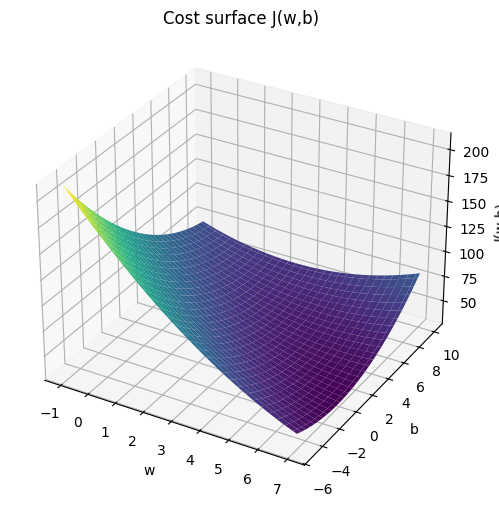

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


w_values = [float(v) for v in np.linspace(-1.0, 7.0, 60)]
b_values = [float(v) for v in np.linspace(-5.0, 10.0, 60)]

W = []
B = []
J_vals = []

for i in range(len(b_values)):
    row_W = []
    row_B = []
    row_J = []
    for j in range(len(w_values)):
        w_curr = w_values[j]
        b_curr = b_values[i]
        row_W.append(w_curr)
        row_B.append(b_curr)
        j_val = compute_cost(M, L, w_curr, b_curr)
        row_J.append(j_val)
    W.append(row_W)
    B.append(row_B)
    J_vals.append(row_J)

W_arr = np.array(W)
B_arr = np.array(B)
J_arr = np.array(J_vals)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(W_arr, B_arr, J_arr, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("J(w,b)")
ax.set_title("Cost surface J(w,b)")
plt.show()

La grafica muestra la funcion de costo J(w,b) en funcion de los parametros de w y b. Esta se puede observar que tiene una superficie convexa la cual puede indicar que tiene un minimo global.

En este caso el minimo representa la combinacion mas optima entre w y b, la cual minimiza el MSE entre las predicciones dadas porr el modelo y las reales.

4. Gradients:






\begin{gathered}
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big) x^{(i)} \\
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big)
\end{gathered}



5. Gradient descent (non-vectorized):


In [16]:
def compute_gradients(M, L, w, b):
    m_local = len(M)
    sum_dw = 0.0
    sum_db = 0.0

    for i in range(m_local):
        f_wb = w * M[i] + b
        error = f_wb - L[i]
        sum_dw += error * M[i]
        sum_db += error

    dj_dw = sum_dw / m_local
    dj_db = sum_db / m_local
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients(M, L, w_test, b_test)
print("Gradients at w=10, b=-4:", dj_dw_test, dj_db_test)

Gradients at w=10, b=-4: -1.723 0.6400000000000002


6. Gradient descent (vectorized):

In [17]:
def compute_gradients(M, L, w, b):
    m = M.shape[0]
    y_hat = w * M + b
    errors = y_hat - L


    dj_dw = (1 / m) * np.sum(errors * M)
    dj_db = (1 / m) * np.sum(errors)
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients(M, L, w_test, b_test)
print("Gradients at w=10, b=-4:", dj_dw_test, dj_db_test)

Gradients at w=10, b=-4: -1.723 0.6399999999999999


In [18]:
def gradient_descent(M, L, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    history = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(M, L, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(M, L, w, b)
        history.append((i, cost))

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history

alpha = 0.01
num_iterations = 2000

w_init = 0.0
b_init = 0.0

w_learned, b_learned, history = gradient_descent(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)

Iteration    0: w= 0.2152, b= 0.1036, cost=112.0896
Iteration  200: w= 7.9674, b=-0.0073, cost= 28.0913
Iteration  400: w= 9.7253, b=-2.9093, cost= 22.3208
Iteration  600: w=11.1759, b=-5.3129, cost= 18.3703
Iteration  800: w=12.3762, b=-7.3015, cost= 15.6658
Iteration 1000: w=13.3693, b=-8.9470, cost= 13.8142
Iteration 1200: w=14.1910, b=-10.3085, cost= 12.5466
Iteration 1400: w=14.8709, b=-11.4350, cost= 11.6788
Iteration 1600: w=15.4334, b=-12.3670, cost= 11.0847
Iteration 1800: w=15.8989, b=-13.1383, cost= 10.6780

Learned parameters:
w = 16.2822484076734
b = -13.77345340049044


7. Convergence (mandatory):

In [19]:
def gradient_descent(M, L, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    history = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(M, L, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(M, L, w, b)
        history.append((i, cost))

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history

alpha = 0.01
num_iterations = 2000

w_init = 0.0
b_init = 0.0

w_learned, b_learned, history = gradient_descent(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)

Iteration    0: w= 0.2152, b= 0.1036, cost=112.0896
Iteration  200: w= 7.9674, b=-0.0073, cost= 28.0913
Iteration  400: w= 9.7253, b=-2.9093, cost= 22.3208
Iteration  600: w=11.1759, b=-5.3129, cost= 18.3703
Iteration  800: w=12.3762, b=-7.3015, cost= 15.6658
Iteration 1000: w=13.3693, b=-8.9470, cost= 13.8142
Iteration 1200: w=14.1910, b=-10.3085, cost= 12.5466
Iteration 1400: w=14.8709, b=-11.4350, cost= 11.6788
Iteration 1600: w=15.4334, b=-12.3670, cost= 11.0847
Iteration 1800: w=15.8989, b=-13.1383, cost= 10.6780

Learned parameters:
w = 16.2822484076734
b = -13.77345340049044


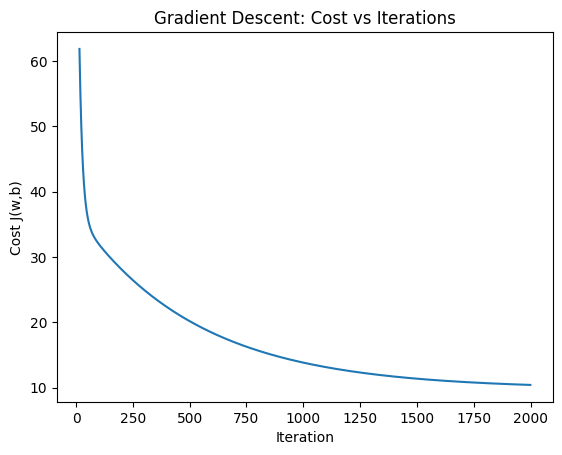

In [20]:
iterations = [it for it, c in history]
costs = [c for it, c in history]

plt.figure()
plt.plot(iterations[15:], costs[15:])
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost vs Iterations")
plt.show()

Durante las primeras iteraciones la funcion de costo disminuye rapidamente. Esto indica que el desenso por gradiante arregla de manera eficiente los parametros iniciales del modelo.

Al tener este comportamiento, se tiene que el algoritmo a convergido hacia un minimo de la funcion. Esto sugiere que la tasa de aprendizaje utilizada es ideal.

8. Experiments (mandatory):

In [21]:
learning_rates = [0.001, 0.01, 0.1]


In [22]:
for alpha in learning_rates:
    w, b, history = gradient_descent(M, L, w_init=0.0, b_init=0.0, alpha=alpha, num_iterations=2000)

    final_cost = history[-1][1]

    print(f"alpha = {alpha}")
    print(f"w final = {w}")
    print(f"b final = {b}")
    print(f"loss final = {final_cost}\n")


Iteration    0: w= 0.0215, b= 0.0104, cost=117.1272
Iteration  200: w= 3.1775, b= 1.3941, cost= 55.5054
Iteration  400: w= 4.8589, b= 1.8976, cost= 39.5456
Iteration  600: w= 5.8048, b= 1.9668, cost= 34.9110
Iteration  800: w= 6.3826, b= 1.8233, cost= 33.1044
Iteration 1000: w= 6.7755, b= 1.5774, cost= 32.0220
Iteration 1200: w= 7.0742, b= 1.2837, cost= 31.1424
Iteration 1400: w= 7.3243, b= 0.9696, cost= 30.3358
Iteration 1600: w= 7.5483, b= 0.6484, cost= 29.5691
Iteration 1800: w= 7.7573, b= 0.3268, cost= 28.8333
alpha = 0.001
w final = 7.95618583813993
b final = 0.009567454004411478
loss final = 28.129021900815786

Iteration    0: w= 0.2152, b= 0.1036, cost=112.0896
Iteration  200: w= 7.9674, b=-0.0073, cost= 28.0913
Iteration  400: w= 9.7253, b=-2.9093, cost= 22.3208
Iteration  600: w=11.1759, b=-5.3129, cost= 18.3703
Iteration  800: w=12.3762, b=-7.3015, cost= 15.6658
Iteration 1000: w=13.3693, b=-8.9470, cost= 13.8142
Iteration 1200: w=14.1910, b=-10.3085, cost= 12.5466
Iteration 

Se realizaron los experimentos usando 3 valores diferentes para la tasa de aprendizaje.

Para alpha 0.001, se obtuvo que el algoritmo converge muy lento y el mse permanece alto, lo que indica un aprendizaje insuficiente.

Para alpha 0.01, se tiene una mejora notable en la convergencia y el mse se reduce de manera significativa.

Finalmente para 0.1, el descenso por gradiante converge mas rapidamente y alcanza el menor valor de la funcion de costo. Esto sin presentar ninguna inestabilidad u oscilaciones, sugiriendo que para este problema, una taza de aprendizaje alta permite resultados mas optimos sin comprometer la estabilidad.

9. Final fit plot:

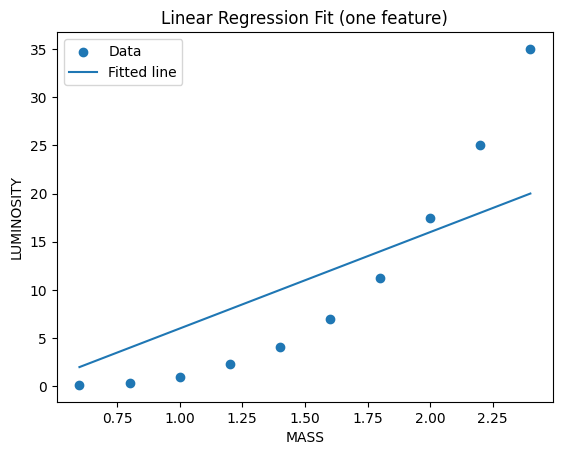

In [23]:
plt.figure()
plt.scatter(M, L, label="Data")
y_pred = predict(M, w_learned, b_learned)
plt.plot(M, L_hat, label="Fitted line")
plt.xlabel("MASS")
plt.ylabel("LUMINOSITY")
plt.title("Linear Regression Fit (one feature)")
plt.legend()
plt.show()


Este grafico muestra que se tienen errores sistematicos como la sobreestimacion de la luminocidad para masas pequeñas y la subestimacion de la misma para masas mas grandes. Este comportamiento nos sugiere que hay un limite en la capacidad predictiva del modelo lineal.

10. Conceptual questions:

1. El significado asttronomico de w, es la representacion de la tasa de cambio de la luminosidad con respecto  a la masa dentro del rango de datos analizado. Dicho de otra forma, indica cuanto aumenta la luminosidad promedio de una estrella cuando su masa se incrementa en una unidad.

2. El modelo lineal es limitado, ya que la relacion fisica (real) entre la masa y la luminosidad estelar no es lineal.